In [1]:
import pandas as pd
import numpy as np
import xlrd
from matplotlib import pyplot as plt
import seaborn as sns


###说明###
# 
# 通过pd.set_option?可以查看这个方法怎么用，后续的所有操作方法一样不再赘述
# 使用原则是需要用的数据整理出来后，进行处理操作时建议用新变量进行copy然后处理，防止数据混杂，也方便不同场景进行导出
#
#########

# 基础配置（一般不需要动）
pd.set_option('display.max_rows',None) # 让pandas展示全部数据（没这个配置会显示省略号）
pd.set_option('display.max_column',None) # 让pandas展示全部数据（没这个配置会显示省略号）
pd.set_option('display.max_colwidth',500) # 让特别长的字段内容全部展示（没这个配置会显示省略号）
pd.set_option('display.width',200) # 让展示时不换行
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
file_path = 'deep_research.xlsx' # 最好是绝对路径
save_file_path = 'tmp.xlsx'

# 千分位格式化函数
def to_thousands_display(x):
    if x != 'NaN':
        return format(x,',')
    
# 需要使用的数据字段（可能需要每次定制）
sample_list=['ID', '下单日期', '丘比特订单号', '代理公司名称', '广告主公司名称','品牌名称', 
        '所属行业', '执行开始日期', '执行结束日期', '合同状态', '归属季度', '执行金额',
        'PC端金额', '移动端金额', 'TV端金额', '多屏金额', '广告主(调整后)', '代理商分类',
        '所属行业(调整后)', 'Year', '1月(调整前)', '2月', '3月', '4月(调整前)', 
        '5月', '6月', '7月(调整前)', '8月', '9月', '10月(调整前)', 
        '11月', '12月', 'Var.', '1月', '4月', '7月', '10月']

In [2]:
# 正式开始pandas对数据进行操作
# 初始化（需要指定读取哪个sheet）
iqiyi_data_syht = pd.read_excel(file_path) # DataFrame读取excel

In [3]:
iqiyi_data_syht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43109 entries, 0 to 43108
Data columns (total 37 columns):
ID           0 non-null float64
下单日期         43109 non-null datetime64[ns]
丘比特订单号       9657 non-null object
代理公司名称       43109 non-null object
广告主公司名称      43109 non-null object
品牌名称         43109 non-null object
所属行业         43109 non-null object
执行开始日期       43109 non-null object
执行结束日期       43109 non-null object
合同状态         43109 non-null object
归属季度         43109 non-null object
执行金额         43109 non-null float64
PC端金额        9714 non-null float64
移动端金额        9713 non-null float64
TV端金额        9714 non-null float64
多屏金额         9716 non-null float64
广告主(调整后)     43109 non-null object
代理商分类        43109 non-null object
所属行业(调整后)    43109 non-null object
Year         43109 non-null int64
1月(调整前)      43109 non-null float64
2月           43109 non-null float64
3月           43109 non-null float64
4月(调整前)      43109 non-null float64
5月           43109 non-null float64
6月     

In [4]:
iqiyi_data_syht.columns

Index(['ID', '下单日期', '丘比特订单号', '代理公司名称', '广告主公司名称', '品牌名称', '所属行业', '执行开始日期', '执行结束日期', '合同状态', '归属季度', '执行金额', 'PC端金额', '移动端金额', 'TV端金额', '多屏金额', '广告主(调整后)', '代理商分类', '所属行业(调整后)', 'Year', '1月(调整前)',
       '2月', '3月', '4月(调整前)', '5月', '6月', '7月(调整前)', '8月', '9月', '10月(调整前)', '11月', '12月', 'Var.', '1月', '4月', '7月', '10月'],
      dtype='object')

In [5]:
iqiyi_data_syht.shape

(43109, 37)

In [ ]:
iqiyi_data_syht.head()

In [6]:
sample_data=iqiyi_data_syht.copy()

In [7]:
sample_data.shape

(43109, 37)

In [9]:
t = np.arange(-1,2,.01)
s = np.sin(2*np.pi*t)

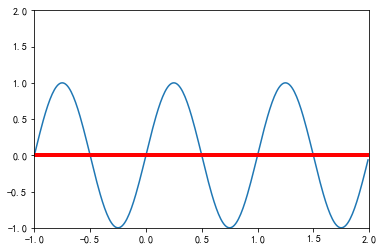

In [10]:
plt.plot(t,s)
l=plt.axhline(linewidth=4,color='r')
plt.axis([-1,2,-1,2])
plt.show()
plt.close()

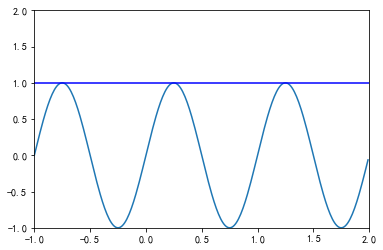

In [11]:
plt.plot(t,s)
l = plt.axhline(y=1,color='b')
plt.axis([-1,2,-1,2])
plt.show()
plt.close()

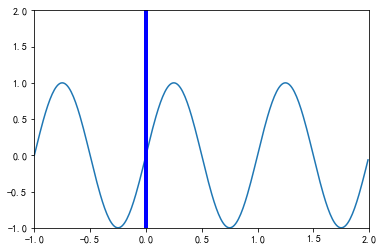

In [12]:
plt.plot(t,s)
l=plt.axvline(x=0,ymin=0,linewidth=4,color='b')
plt.axis([-1,2,-1,2])
plt.show()
plt.close()

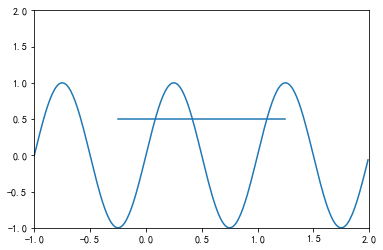

In [13]:
plt.plot(t,s)
l=plt.axhline(y=.5,xmin=0.25,xmax=0.75)
plt.axis([-1,2,-1,2])
plt.show()
plt.close()

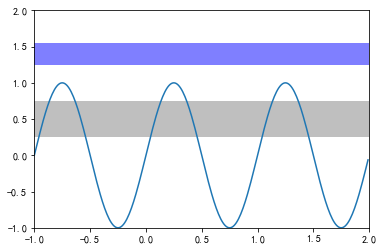

In [14]:
plt.plot(t,s)
p = plt.axhspan(0.25,0.75,facecolor='0.5',alpha=0.5)
p = plt.axhspan(1.25,1.55,facecolor='b',alpha=0.5)
plt.axis([-1,2,-1,2])
plt.show()

In [15]:
x=np.arange(9)
y=np.sin(x)
z=np.cos(x)

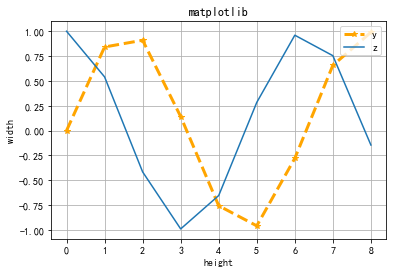

In [16]:
plt.plot(x,y,marker='*',linewidth=3,linestyle='--',color='orange')
plt.plot(x,z)
plt.title('matplotlib')
plt.xlabel('height')
plt.ylabel('width')
plt.legend(['y','z'],loc='upper right')
plt.grid(True)
plt.show()

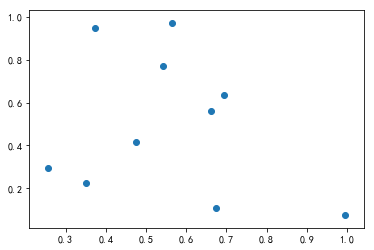

In [17]:
x=np.random.rand(10)
y=np.random.rand(10)
plt.scatter(x,y)
plt.show()

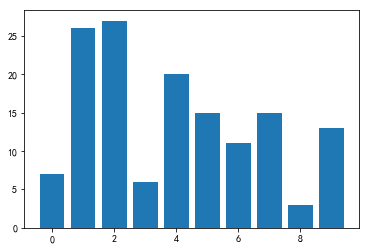

In [18]:
x=np.arange(10)
y=np.random.randint(0,30,10)
plt.bar(x,y)
plt.show()

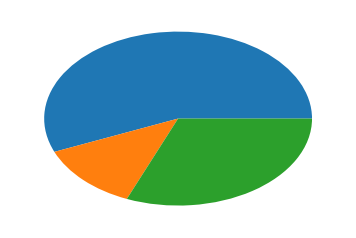

In [19]:
x=np.random.randint(1,10,3)
plt.pie(x)
plt.show()

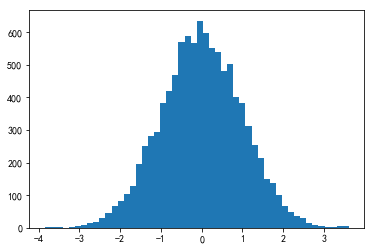

In [20]:
mean, sigma = 0, 1
x = mean + sigma*np.random.randn(10000)
plt.hist(x,50)
plt.show()

In [8]:
sample_data.isnull().sum()

ID           43109
下单日期             0
丘比特订单号       33452
代理公司名称           0
广告主公司名称          0
品牌名称             0
所属行业             0
执行开始日期           0
执行结束日期           0
合同状态             0
归属季度             0
执行金额             0
PC端金额        33395
移动端金额        33396
TV端金额        33395
多屏金额         33393
广告主(调整后)         0
代理商分类            0
所属行业(调整后)        0
Year             0
1月(调整前)          0
2月               0
3月               0
4月(调整前)          0
5月               0
6月               0
7月(调整前)          0
8月               0
9月               0
10月(调整前)         0
11月              0
12月              0
Var.             0
1月               0
4月               0
7月               0
10月              0
dtype: int64

In [ ]:
sample_data.fillna()

In [9]:
import statsmodels.api as sm

In [24]:
X = sample_data['归属季度']
Y = sample_data['执行金额']

In [34]:
type(Y)

pandas.core.series.Series

In [46]:
X = sm.add_constant(X)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [44]:
enc = LabelEncoder()
label_encoder=enc.fit(X['归属季度'])
X=label_encoder.transform(X['归属季度'])+1

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [45]:
X

array([ 1,  1,  1, ..., 17, 17, 17])

In [47]:
model = sm.OLS(Y,X).fit()

In [48]:
model.params

const   -23211.357857
x1       74494.905971
dtype: float64

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   执行金额   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1189.
Date:                Wed, 27 Jun 2018   Prob (F-statistic):          4.02e-257
Time:                        21:39:25   Log-Likelihood:            -6.8733e+05
No. Observations:               43109   AIC:                         1.375e+06
Df Residuals:                   43107   BIC:                         1.375e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.321e+04   2.15e+04     -1.080      0.280   -6.53e+04    1.89e+04
x1          7.449e+04   2160.090     34.487      0.000    7.03e+04    7.87e+04
==============================================================================
Omnibus:                    91830.571   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        762649925.364
Skew:                          18.577   Prob(JB):                         0.00
Kurtosis:                     653.545   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""